In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.regression.linear_model as sm

In [2]:
scores = pd.read_csv('Polarity Scores.csv')
songs = pd.read_csv('Songs_Sampled.csv')

In [3]:
speechiness = songs['speechiness']
acousticness = songs['acousticness']
valence = songs['valence']
years = songs['Year']
comp_score = scores['Comp_Score']

sa, sv, sy = [], [], []
av, ay = [], []
vy = []
sav, say, avy, svy  = [], [], [], []
savy = []

for i in range(600):
    sa.append(speechiness[i] * acousticness[i])
    sv.append(speechiness[i] * valence[i])
    sy.append(speechiness[i] * years[i])
    av.append(acousticness[i] * valence[i])
    ay.append(acousticness[i] * years[i])
    vy.append(valence[i] * years[i])
    sav.append(speechiness[i] * acousticness[i] * valence[i])
    say.append(speechiness[i] * acousticness[i] * years[i])
    avy.append(acousticness[i] * valence[i] * years[i])
    svy.append(speechiness[i] * valence[i] * years[i])
    savy.append(speechiness[i] * acousticness[i] * valence[i] * years[i])

In [4]:
dict = { 'Year': years,
        'Speechiness': speechiness,
        'Acousticness': acousticness,
        'Valence': valence,
        'sa': sa,
        'sv': sv,
        'sy': sy,
        'av': av,
        'ay': ay,
        'vy': vy,
        'sav': sav,
        'say': say,
        'avy': avy,
        'svy': svy,
        'savy': savy,
        'Comp_Score': comp_score
}

df = pd.DataFrame(dict)

In [5]:
df = df.dropna()
df

,Year,Speechiness,Acousticness,Valence,sa,sv,sy,av,ay,vy,sav,say,avy,svy,savy,Comp_Score
0,1959,0.0323,0.920000,0.285,0.029716,0.009206,63.2757,0.262200,1802.280000,558.315,0.008469,58.213644,513.649800,18.033575,16.590889,0.9792
1,1963,0.0385,0.000368,0.539,0.000014,0.020752,75.5755,0.000198,0.722384,1058.057,0.000008,0.027812,0.389365,40.735195,0.014991,0.8934
2,1962,0.0376,0.988000,0.271,0.037149,0.010190,73.7712,0.267748,1938.456000,531.702,0.010067,72.885946,525.321576,19.991995,19.752091,1.0000
3,1961,0.0279,0.825000,0.954,0.023017,0.026617,54.7119,0.787050,1617.825000,1870.794,0.021959,45.137318,1543.405050,52.195153,43.061001,0.9999
4,1961,0.0438,0.153000,0.729,0.006701,0.031930,85.8918,0.111537,300.033000,1429.569,0.004885,13.141445,218.724057,62.615122,9.580114,-0.5120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2018,0.0454,0.354000,0.374,0.016072,0.016980,91.6172,0.132396,714.372000,754.732,0.006011,32.432489,267.175128,34.264833,12.129751,0.9972
596,2018,0.0930,0.076200,0.188,0.007087,0.017484,187.6740,0.014326,153.771600,379.384,0.001332,14.300759,28.909061,35.282712,2.688543,-0.9850
597,2013,0.0593,0.000704,0.534,0.000042,0.031666,119.3709,0.000376,1.417152,1074.942,0.000022,0.084037,0.756759,63.744061,0.044876,0.9967
598,2016,0.1720,0.157000,0.422,0.027004,0.072584,346.7520,0.066254,316.512000,850.752,0.011396,54.440064,133.568064,146.329344,22.973707,0.9863


In [6]:
X = df[['Year', 'Valence', 'Acousticness', 'Speechiness', 'sa', 'sv', 'sy', 'av', 'ay', 'vy', 'sav', 'say', 'avy', 'svy', 'savy']]
y = df['Comp_Score']


In [7]:
model = sm.OLS(y, X)
results = model.fit()
results.params

Year              0.000329
Valence          -3.484877
Acousticness     13.826840
Speechiness     240.556155
sa             -554.686150
sv             -197.283798
sy               -0.121055
av                8.655399
ay               -0.006725
vy                0.001673
sav             318.654662
say               0.273881
avy              -0.004547
svy               0.098799
savy             -0.152817
dtype: float64

In [8]:
decades = []
for row_index, row in df.iterrows():
    year = df.at[row_index, 'Year']
    if year < 1970:
        decades.append('1958-1969')
    elif (year >= 1970 and year < 1980):
        decades.append('1970-1979')
    elif (year >= 1980 and year < 1990):
        decades.append('1980-1989')
    elif (year >= 1990 and year < 2000):
        decades.append('1990-1999')
    elif (year >= 2000 and year < 2010):
        decades.append('2000-2010')
    else:
        decades.append('2010-2019')

In [9]:
residuals = []
for row_index, row in df.iterrows():
    y = df.at[row_index, 'Year']
    v = df.at[row_index, 'Valence']
    a = df.at[row_index, 'Acousticness'] 
    s = df.at[row_index, 'Speechiness'] 
    
    sa = df.at[row_index, 'sa']          
    sv = df.at[row_index, 'sv']               
    sy = df.at[row_index, 'sy']                
    av = df.at[row_index, 'av']           
    ay = df.at[row_index, 'ay']                
    vy = df.at[row_index, 'vy']                   
    sav = df.at[row_index, 'sav']          
    say = df.at[row_index, 'say']                
    avy = df.at[row_index, 'avy']                 
    svy = df.at[row_index, 'svy']                   
    savy = df.at[row_index, 'savy']    

    measured = df.at[row_index, 'Comp_Score']
    predicted = results.predict([y, v, a, s, sa, sv, sy, av, ay, vy, sav, say, avy, svy, savy])[0]
    residuals.append(predicted-measured)

In [10]:
df['Decade'] = decades
df['Residual'] = residuals
df.head()

,Year,Speechiness,Acousticness,Valence,sa,sv,sy,av,ay,vy,sav,say,avy,svy,savy,Comp_Score,Decade,Residual
0,1959,0.0323,0.920000,0.285,0.029716,0.009206,63.2757,0.262200,1802.280000,558.315,0.008469,58.213644,513.649800,18.033575,16.590889,0.9792,1958-1969,-0.159136
1,1963,0.0385,0.000368,0.539,0.000014,0.020752,75.5755,0.000198,0.722384,1058.057,0.000008,0.027812,0.389365,40.735195,0.014991,0.8934,1958-1969,-0.312880
2,1962,0.0376,0.988000,0.271,0.037149,0.010190,73.7712,0.267748,1938.456000,531.702,0.010067,72.885946,525.321576,19.991995,19.752091,1.0000,1958-1969,-0.229654
3,1961,0.0279,0.825000,0.954,0.023017,0.026617,54.7119,0.787050,1617.825000,1870.794,0.021959,45.137318,1543.405050,52.195153,43.061001,0.9999,1958-1969,-0.221151
4,1961,0.0438,0.153000,0.729,0.006701,0.031930,85.8918,0.111537,300.033000,1429.569,0.004885,13.141445,218.724057,62.615122,9.580114,-0.5120,1958-1969,1.077212


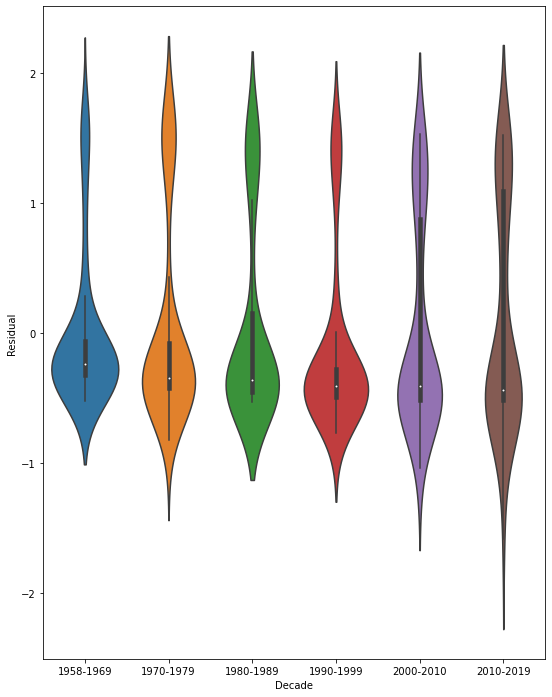

In [11]:
fig, ax = plt.subplots(figsize=(9, 12))
ax = sns.violinplot(x='Decade', y='Residual', data=df)